In [1]:
import pandas as pd
import anndata
from anndata import AnnData
import scanpy as sc
import matplotlib.pyplot as plt
from os.path import join
import numpy as np
import glob

In [2]:
raw_dir = "raw/habib_2017/"

In [3]:
df_mat = pd.read_csv(join(raw_dir, "SCP90/expression/Human_Processed_GTEx_Data.DGE.UMI-Counts.txt.gz"), sep='\t', index_col=0)
df_meta = pd.read_csv(join(raw_dir, "SCP90/metadata/Human_DroNc-seq_Regions.txt"), sep='\t').iloc[1:, :].set_index("NAME")
assert np.all(df_meta.index == df_mat.columns)
adata = AnnData(df_mat.T, obs=df_meta)

In [4]:
for f in glob.glob(join(raw_dir, "SCP90/cluster/*")):
    df = pd.read_csv(f, sep='\t').iloc[1:, :].set_index("NAME")
    if ".And.Sub-CLusters" in f:
        col_name = f.split('/')[-1].split('.')[1]
        adata.obs[[col_name + "_X", col_name + "_Y", col_name + "_cluster"]] = df.reindex(adata.obs.index).astype(float)
    else:
        col_name = f.split('/')[-1].split('.')[-2]
        adata.obs[[col_name + "_X", col_name + "_Y"]] = df.reindex(adata.obs.index).astype(float)
adata.write_h5ad("processed/habib_2017.raw.h5ad")

... storing 'Cluster' as categorical
... storing 'Region' as categorical


/n/holystore01/LABS/price_lab/Users/khou/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


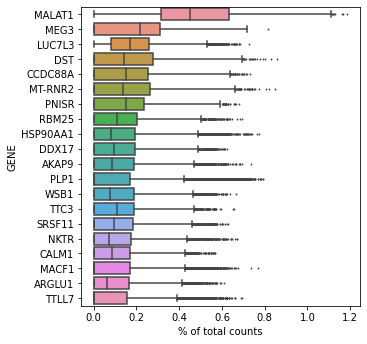

/n/holystore01/LABS/price_lab/Users/khou/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/n/holystore01/LABS/price_lab/Users/khou/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:
adata = sc.read_h5ad("processed/habib_2017.raw.h5ad")
    
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_genes(adata, min_cells=0)
adata.raw = adata

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highest_expr_genes(adata, n_top=20)
adata = adata[:, adata.var.highly_variable]


sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.set_figure_params(dpi=150)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

sc.pl.umap(adata, color=["Cluster", "Region"], ncols=1)

raw_adata = adata.raw.to_adata()
raw_adata.write_h5ad("processed/habib_2017.processed.h5ad")

In [21]:
raw_adata.obs

,Cluster,Region,CA_X,CA_Y,CA_cluster,PFC_X,PFC_Y,PFC_cluster,tSNE_coordinate_X,tSNE_coordinate_Y,GABAergic_X,GABAergic_Y,GABAergic_cluster,n_genes,leiden
NAME,,,,,,,,,,,,,,,
hHP1_AACACTATCTAC,4,Hip,-3.377839,2.639961,4.0,NaN,NaN,NaN,-8.436537,7.721106,NaN,NaN,NaN,2481,5
hHP1_CTACGCATCCAT,3,Hip,15.241285,-6.950115,1.0,NaN,NaN,NaN,-6.606278,8.099538,NaN,NaN,NaN,2847,5
hHP1_TCGGTACTAATA,3,Hip,13.510883,-6.873288,1.0,NaN,NaN,NaN,-6.724967,8.011943,NaN,NaN,NaN,2881,5
hHP1_CCCGCACGCTAT,3,Hip,13.356688,-7.687274,1.0,NaN,NaN,NaN,-6.286364,7.892359,NaN,NaN,NaN,2628,5
hHP1_TCATTTTGTCAT,3,Hip,19.331815,-4.659301,1.0,NaN,NaN,NaN,-10.455725,2.374719,NaN,NaN,NaN,2220,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFC-CD_TTGCCTGGCGGG,17,PFC,NaN,NaN,NaN,NaN,NaN,NaN,8.569801,14.270926,NaN,NaN,NaN,493,11
PFC-CD_CACGCTCCCCTA,1,PFC,NaN,NaN,NaN,NaN,NaN,NaN,-2.175746,2.524650,NaN,NaN,NaN,217,0
PFC-CD_GCTCTACAACCG,16,PFC,NaN,NaN,NaN,NaN,NaN,NaN,13.474101,11.062591,NaN,NaN,NaN,430,10


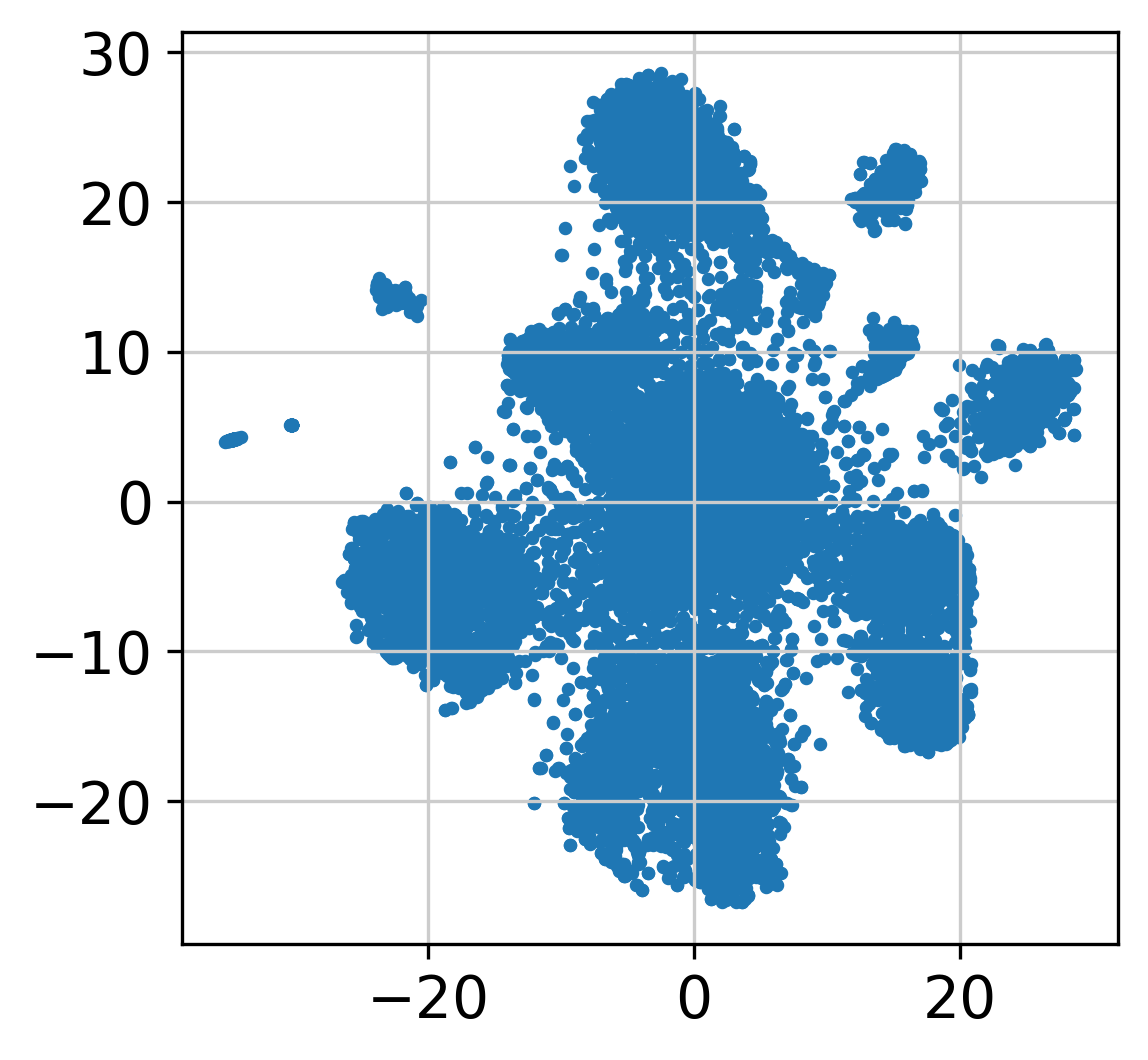

In [22]:
plt.scatter(raw_adata.obs["tSNE_coordinate_X"], raw_adata.obs["tSNE_coordinate_Y"], s=5)